In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline    
#to show the plot in the same cell 

In [6]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [7]:
df = pd.read_csv(url)

In [10]:
df.sample(5) # give a rendom sample of our data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
780,2014,MINI,COOPER CLUBMAN,SUBCOMPACT,1.6,4,A6,Z,8.7,6.6,7.8,36,179
45,2014,AUDI,R8,TWO-SEATER,4.2,8,M6,Z,21.2,13.4,17.7,16,407
995,2014,TOYOTA,SIENNA AWD,MINIVAN,3.5,6,AS6,X,14.2,10.3,12.4,23,285
377,2014,FORD,F150 FFV,PICKUP TRUCK - STANDARD,3.7,6,AS6,X,14.0,10.3,12.3,23,283
515,2014,HYUNDAI,SONATA HYBRID,MID-SIZE,2.4,4,AS6,X,6.5,5.9,6.2,46,143


In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
285,5.7,8,13.4,308
759,5.5,8,15.8,363
453,4.3,6,11.8,271
879,3.8,6,10.7,246
766,5.5,8,15.5,356
920,3.6,6,11.4,262
1009,3.5,6,11.0,253
194,6.2,8,14.8,340
668,5.0,8,12.6,290


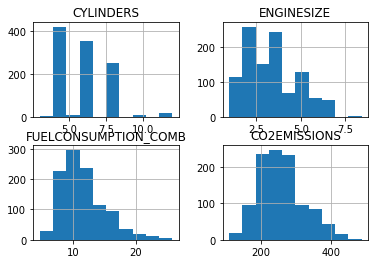

In [13]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

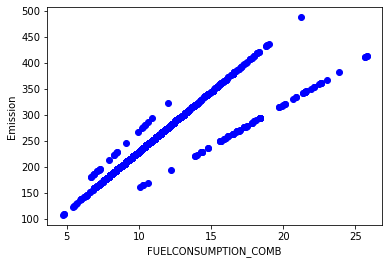

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

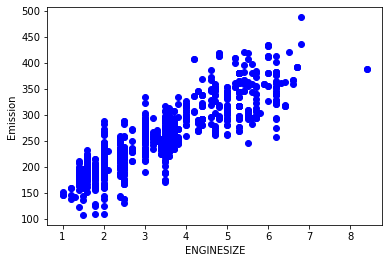

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

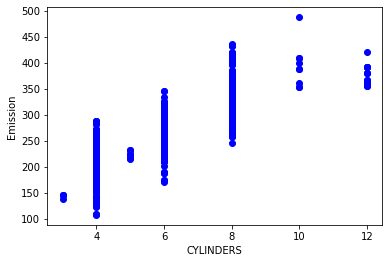

In [20]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

In [21]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [24]:
X

array([2. , 2.4, 1.5, ..., 3. , 3.2, 3.2])

In [25]:
y

array([196, 221, 136, ..., 271, 260, 294], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

In [30]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

regressor.fit(X_train.reshape(-1,1), y_train)

#print the parameters of our model
print("Coefficients: ", regressor.coef_[0])
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434046
Intercept:  126.2897021740873


Text(0, 0.5, 'Emission')

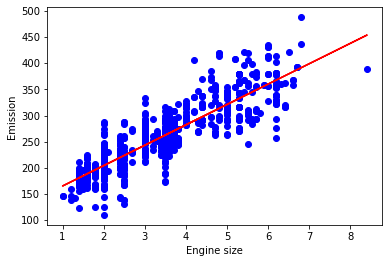

In [33]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.coef_* X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regressor.predict(X_test.reshape(-1,1))

print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_absolute_error(y_test, y_pred)))
print("R2: ",r2_score(y_test, y_pred))

Mean Absolute Error:  24.097257411707837
Mean Squared Error:  985.9381692274995
Root Mean Squared Error:  4.908895742599127
R2:  0.7615595731934374


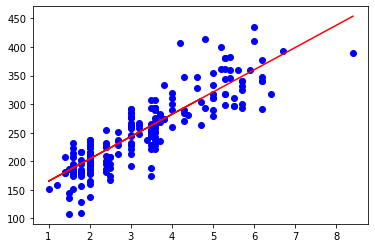

In [36]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, '-r')


Text(0, 0.5, 'Emission')

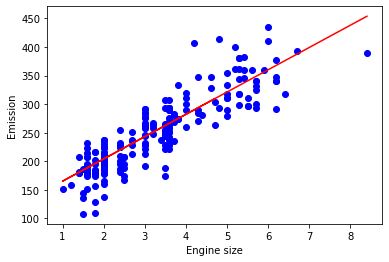

In [37]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [38]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [44]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1,1), y_train)


LinearRegression()

In [45]:
y_predict = regr.predict(X_test.reshape(-1,1))

In [48]:
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ",mean_squared_error(y_test, y_predict))
print("Root Mean Squared Error: ",np.sqrt(mean_absolute_error(y_test, y_predict)))
print("R2: ",r2_score(y_test, y_predict))

Mean Absolute Error:  20.441911472549585
Mean Squared Error:  797.4346310097205
Root Mean Squared Error:  4.521273213658912
R2:  0.8071474868274242
